In [28]:
# import lib
import tensorflow as tf
import numpy as np
import sys, os,cv2
from sklearn.utils import shuffle
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom

old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data

# data
mnist = input_data.read_data_sets('../../Dataset/FashionMNIST/', one_hot=False)
x_data, train_label, y_data, test_label = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
x_data_added,x_data_added_label         = mnist.validation.images,mnist.validation.labels
x_data = x_data.reshape(-1, 28, 28, 1)  # 28x28x1 input img
y_data = y_data.reshape(-1, 28, 28, 1)  # 28x28x1 input img
x_data_added = x_data_added.reshape(-1, 28, 28, 1) 

x_data      = np.vstack((x_data,x_data_added))
train_label = np.vstack((train_label[:,None],x_data_added_label[:,None]))

train_batch = np.zeros((60000,28,28,1))
test_batch  = np.zeros((10000,28,28,1))

for x in range(len(x_data)):
    train_batch[x,:,:,:] = np.expand_dims(imresize(x_data[x,:,:,0],(28,28)),axis=3)
for x in range(len(y_data)):
    test_batch[x,:,:,:] = np.expand_dims(imresize(y_data[x,:,:,0],(28,28)),axis=3)

# print out the data shape and the max and min value
print(train_batch.shape)
print(train_batch.max())
print(train_batch.min())
print(train_label.shape)
print(train_label.max())
print(train_label.min())
print(test_batch.shape)
print(test_batch.max())
print(test_batch.min())
print(test_label.shape)
print(test_label.max())
print(test_label.min())
# -- end code --

Extracting ../../Dataset/FashionMNIST/train-images-idx3-ubyte.gz
Extracting ../../Dataset/FashionMNIST/train-labels-idx1-ubyte.gz
Extracting ../../Dataset/FashionMNIST/t10k-images-idx3-ubyte.gz
Extracting ../../Dataset/FashionMNIST/t10k-labels-idx1-ubyte.gz


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning:

Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning:

Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.



(60000, 28, 28, 1)
255.0
0.0
(60000, 1)
9
0
(10000, 28, 28, 1)
255.0
0.0
(10000,)
9
0


In [32]:
# normalize and make plotly connnection
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
train_batch = train_batch/255.0
test_batch  = test_batch /255.0

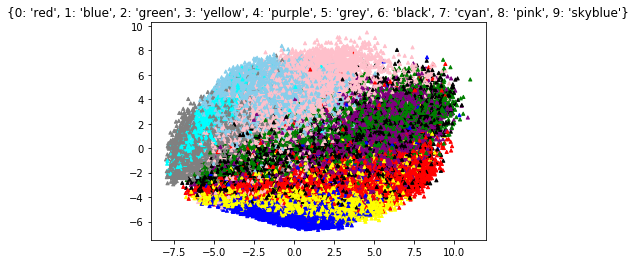

In [27]:
# High level SK PCA
from sklearn.decomposition import PCA
sk_pca = PCA(2)
sk_data_fit = sk_pca.fit_transform(train_batch.reshape((60000,-1)))

color_dict = {
    0:'red',
    1:'blue',
    2:'green',
    3:'yellow',
    4:'purple',
    5:'grey',
    6:'black',
    7:'cyan',
    8:'pink',
    9:'skyblue',
}  
color_mapping = [ color_dict[x[0]] for x in train_label ]

plt.title(str(color_dict))
plt.scatter(sk_data_fit[:,0],sk_data_fit[:,1],c=color_mapping,marker='^', s=10)
plt.show()

# Reference
1. Implementing T-SNE in Tensorflow [ Manual Back Prop in TF ]. (2018). Towards Data Science. Retrieved 1 November 2018, from https://towardsdatascience.com/implementing-t-sne-in-tensorflow-manual-back-prop-in-tf-b08c21ee8e06
